In [2]:
# import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

## Prepare Data

In [3]:
# Import Data to Dataframe
df = pd.read_csv('advertising.csv')
print(df.shape)
print(df.info())
print(df.head())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


## Explore

In [4]:
df.drop(columns='Sales').describe(include = 'all')

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


Text(0.5, 1.0, 'Advertising Correlation With Sales')

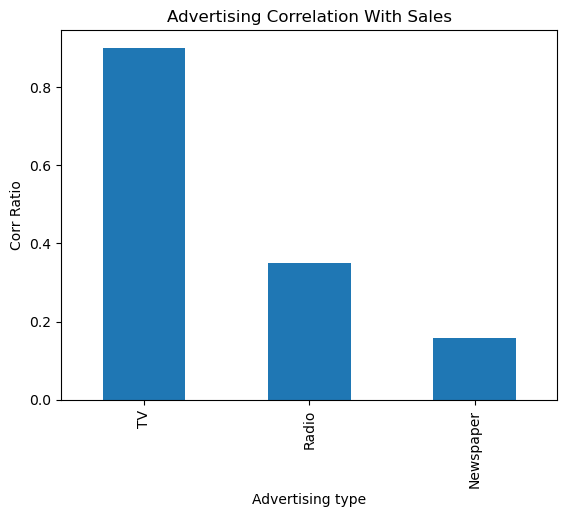

In [5]:
df.corr()['Sales'][:3].plot(kind='bar')
plt.xlabel('Advertising type')
plt.ylabel('Corr Ratio')
plt.title('Advertising Correlation With Sales')

### TV

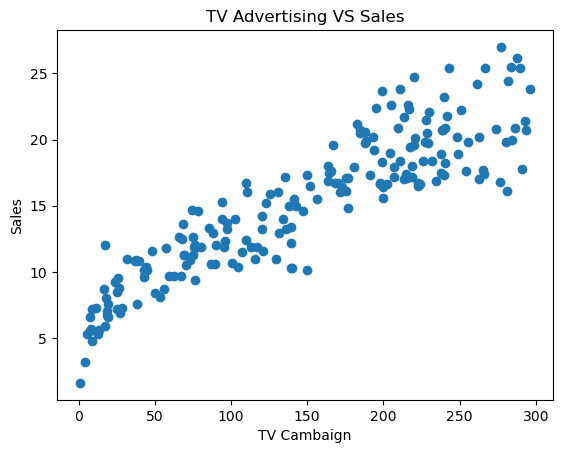

In [6]:
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV Cambaign')
plt.ylabel('Sales')
plt.title('TV Advertising VS Sales');

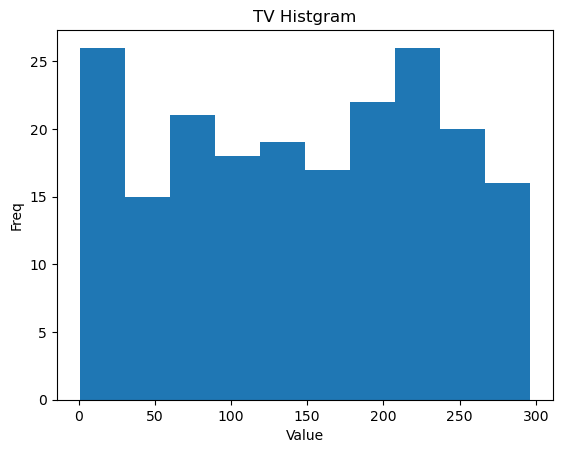

In [7]:
plt.hist(df['TV'])
plt.xlabel('Value')
plt.ylabel('Freq')
plt.title('TV Histgram');

### Radio

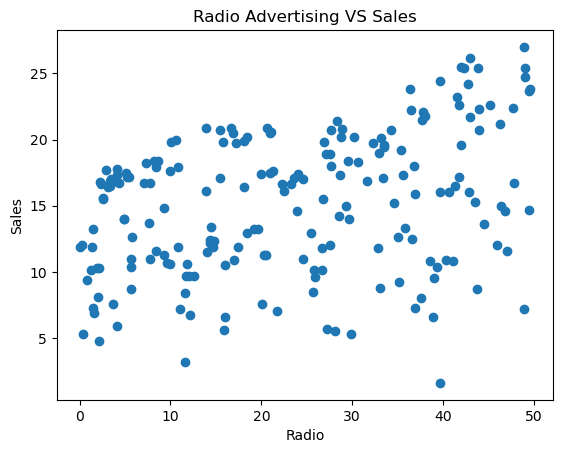

In [8]:
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio Advertising VS Sales');

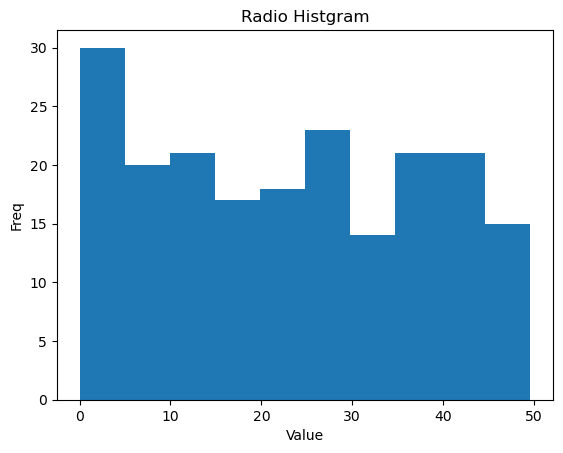

In [9]:
plt.hist(df['Radio'])
plt.xlabel('Value')
plt.ylabel('Freq')
plt.title('Radio Histgram');

### Newspaper

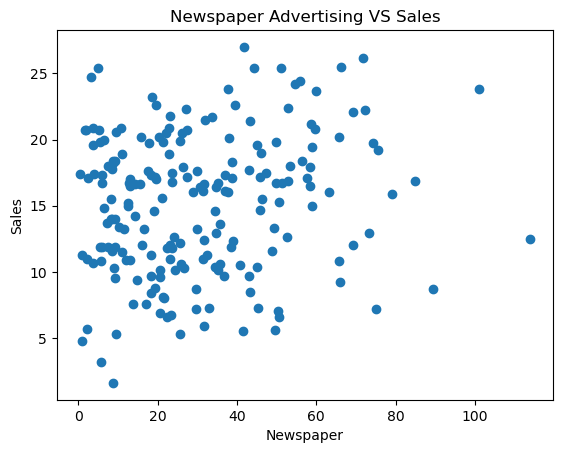

In [10]:
plt.scatter(df['Newspaper'],df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper Advertising VS Sales');

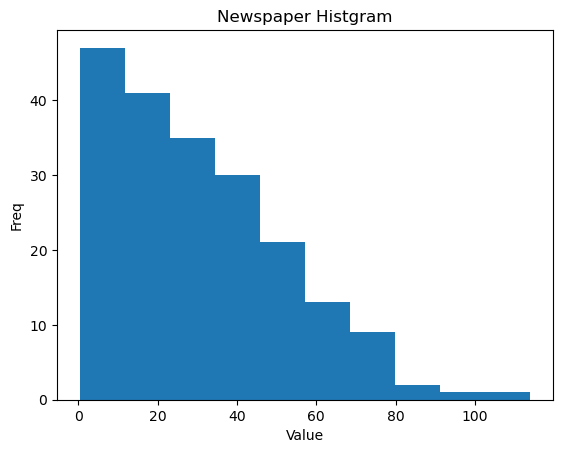

In [11]:
plt.hist(df['Newspaper'])
plt.xlabel('Value')
plt.ylabel('Freq')
plt.title('Newspaper Histgram');

## Build Model

In [12]:
# split our data to Target and feautres
target = 'Sales'
X= df.drop(columns=target)
y = df[target]

In [13]:
#split our data to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


### Baseline

In [14]:
# get our baseline model to compare our model to 
y_baseline = [y.mean()] * len(y)
baseline_MAE= mean_absolute_error(y,y_baseline) 
print(f'Baseline = {y_baseline[0].round()}')
print(f'Baseline MAE = {baseline_MAE.round()}')

Baseline = 15.0
Baseline MAE = 4.0


### Iterate

In [15]:
# build model 
model = LinearRegression()
# fit model
model.fit(X_train,y_train)

LinearRegression()

### Evaluate

In [16]:
# Get our model MAE score and compare it to our baseline model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'MAE Of Model On Train Data = {mean_absolute_error(y_train,y_pred_train).round(2)}')
print(f'MAE Of Model On Test Data = {mean_absolute_error(y_test,y_pred_test).round(2)}')
print(f'Baseline MAE = {baseline_MAE.round(2)}')

MAE Of Model On Train Data = 1.29
MAE Of Model On Test Data = 1.07
Baseline MAE = 4.43


## Comunicate

In [17]:
df.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Sales         22.1
Name: 0, dtype: float64

In [20]:
##### Interactive program to get Sales Prediction 
intercept= model.intercept_
coef = model.coef_

Tv = float(input('Enter Your Tv Value To Predict Sales'))
Radio = float(input('Enter Your Radio Value To Predict Sales'))
Newspaper = float(input('Enter Your Newspaper Value To Predict Sales'))


predict = intercept + (Tv*coef[0]) + (Radio * coef[1]) + (Newspaper * coef[2])
print(f'Your Expected Sales = {predict.round(2)}')

Enter Your Tv Value To Predict Sales 230.1
Enter Your Radio Value To Predict Sales 37.8
Enter Your Newspaper Value To Predict Sales 69.2


Your Expected Sales = 21.29


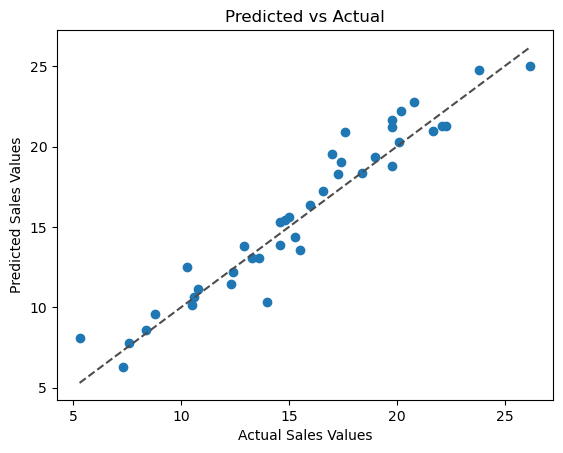

In [19]:
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()],
[y_test.min(), y_test.max()], '--', c='.3')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Sales Values')
plt.ylabel('Predicted Sales Values')
plt.show()